# Week 2 - Assignment

#### Roshana Mojtaba - 2050955
#### Attar Aidin - 2048654
#### Amjadi Bahador - 2040470
#### Joulaei Vijouyeh Roya - 2050954

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras,sklearn
import tensorflow as tf
import pandas as pd
import ast
import seaborn as sns


from keras.models import Sequential
from keras.layers import Dropout, Dense, MaxPool1D, Conv1D
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

plt.rcParams['font.size'] = 14

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

%run nonlinear_function.py

Num GPUs Available:  0


## Exercise 1

In [2]:
#training data
perc_train = 0.8

#keras works with numpy arrays: just use them from the start
TYPE = 1
x = np.loadtxt(filename('data', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels', TYPE), delimiter=' ')
N = len(x)

x_red = np.loadtxt(filename('data_red', TYPE), delimiter=' ')
y_red = np.loadtxt(filename('labels_red', TYPE), delimiter=' ')
N_red = len(x_red)

x_inc = np.loadtxt(filename('data_inc', TYPE), delimiter=' ')
y_inc = np.loadtxt(filename('labels_inc', TYPE), delimiter=' ')
N_inc = len(x_inc)


#dim of a sample
L = len(x[0])
print('Regular set:', L)

L_red = len(x_red[0])
print('Reduced set:', L_red)

L_inc = len(x_inc[0])
print('Increased set:', L_inc)


N_train_red = int( perc_train * N_red )
N_train_inc = int( perc_train * N_inc )
N_train     = int( perc_train * N     )
print(f'Regular data\t\t: {N}\t\t\ttrain\t\t: {N_train}')
print(f'Reduced data\t\t: {N_red}\t\t\ttrain\t\t: {N_train_red}')
print(f'Increased data\t\t: {N_inc}\t\t\ttrain\t\t: {N_train_inc}')

Regular set: 2
Reduced set: 2
Increased set: 2
Regular data		: 4000			train		: 3200
Reduced data		: 2000			train		: 1600
Increased data		: 8000			train		: 6400


### Split training and test data

In [3]:
(x_train, y_train) = (x[:N_train],y[:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [4]:
(x_train_red, y_train_red) = (x_red[:N_train_red],y_red[:N_train_red])
(x_valid_red, y_valid_red) = (x_red[N_train_red:],y_red[N_train_red:])
print("Train:",len(x_train_red),"\t Validation:",len(x_valid_red))

Train: 1600 	 Validation: 400


In [5]:
(x_train_inc, y_train_inc) = (x_inc[:N_train_inc],y_inc[:N_train_inc])
(x_valid_inc, y_valid_inc) = (x_inc[N_train_inc:],y_inc[N_train_inc:])
print("Train:",len(x_train_inc),"\t Validation:",len(x_valid_inc))

Train: 6400 	 Validation: 1600


In [ ]:
x_train_aug = np.zeros( shape = (x_train.shape[0] * 10, x_train.shape[1]) )
y_train_aug = np.zeros( shape =  y_train.shape[0] * 10 )
for i in range( x_train.shape[0] ):
    S    = np.random.normal( 0, 1 , size = ( 10, 2 ) )
    x_train_aug[i*10:i*10+10] = np.array( [x[i, 0] + S[:, 0], x[i, 1] + S[:, 1]] ).T
    y_train_aug[i*10:i*10+10] = y[i]
x_valid_aug, y_valid_aug = x_valid, y_valid

x_aug = np.concatenate( [x_train_aug, x_valid_aug] )
y_aug = np.concatenate( [y_train_aug, y_valid_aug] )

N_aug = len(x_aug)

N_train_aug = len(x_train_aug)
print(f'Augmented data\t\t: {N_aug}\t\t\ttrain\t\t: {N_train_aug}')

L_aug = len(x_aug[0])
print('Augmented set:', L_inc)

print("Train:",len(x_train_aug),"\t Validation:",len(x_valid_aug))


Augmented data		: 32800			train		: 32000
Augmented set: 2
Train: 32000 	 Validation: 800


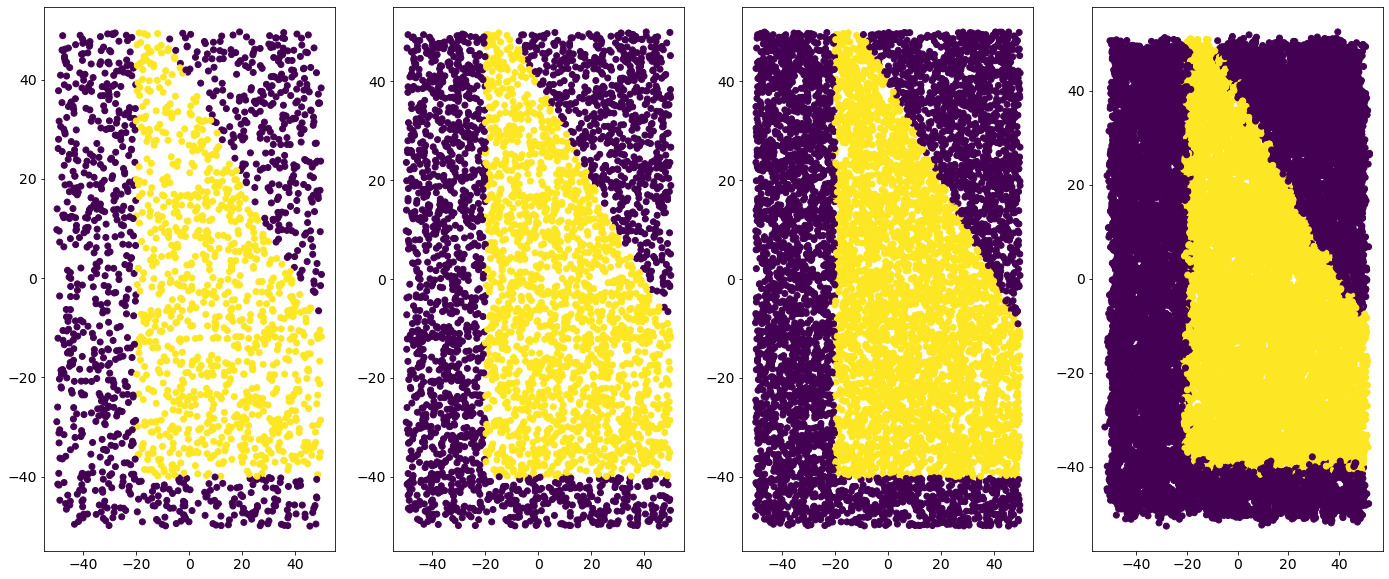

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (24,10))
ax[0].scatter(x_red[:,0],x_red[:,1],c=y_red)
ax[1].scatter(x    [:,0],x    [:,1],c=y    )
ax[2].scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
ax[3].scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
plt.show()

### Rescale input data

In [6]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

x_train_red = Rescale(x_train_red)
x_valid_red = Rescale(x_valid_red)

x_train_inc = Rescale(x_train_inc)
x_valid_inc = Rescale(x_valid_inc)

x_train_aug = Rescale(x_train_aug)
x_valid_aug = Rescale(x_valid_aug)

NameError: name 'x_train_aug' is not defined

In [ ]:
# reproducibility
np.random.seed(12345)

CASE = 1

if CASE==1:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dropout(0.2)) #more stochastic
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='sigmoid'))
    model_red.add(Dense(3, activation='sigmoid'))
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_red.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 6         
                                                                 
 dense_17 (Dense)            (None, 20)                60        
                                                                 
 dense_18 (Dense)            (None, 20)                420       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
CASE = 1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2)                 6         
                                                                 
 dense_21 (Dense)            (None, 20)                60        
                                                                 
 dense_22 (Dense)            (None, 20)                420       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
CASE = 1

if CASE==1:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dropout(0.2)) #more stochastic
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='sigmoid'))
    model_inc.add(Dense(3, activation='sigmoid'))
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_inc.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2)                 6         
                                                                 
 dense_25 (Dense)            (None, 20)                60        
                                                                 
 dense_26 (Dense)            (None, 20)                420       
                                                                 
 dropout_6 (Dropout)         (None, 20)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
CASE = 1

if CASE==1:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dropout(0.2)) #more stochastic
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='sigmoid'))
    model_aug.add(Dense(3, activation='sigmoid'))
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_aug.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 2)                 6         
                                                                 
 dense_29 (Dense)            (None, 20)                60        
                                                                 
 dense_30 (Dense)            (None, 20)                420       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


### Optimization method and cost function

In [ ]:
model_red.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_inc.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model_aug.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

### Training

In [ ]:
fit_red = model_red.fit(x_train_red, y_train_red,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_red,y_valid_red),
                        verbose=1)

Epoch 1/400
32/32 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5594 - val_loss: 0.6884 - val_accuracy: 0.5875
Epoch 2/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5869 - val_loss: 0.6834 - val_accuracy: 0.6200
Epoch 3/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6156 - val_loss: 0.6772 - val_accuracy: 0.6300
Epoch 4/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6200 - val_loss: 0.6670 - val_accuracy: 0.6500
Epoch 5/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6425 - val_loss: 0.6553 - val_accuracy: 0.6450
Epoch 6/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6519 - val_loss: 0.6426 - val_accuracy: 0.6625
Epoch 7/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6869 - val_loss: 0.6266 - val_accuracy: 0.6850
Epoch 8/400
3

In [ ]:
fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=1)

Epoch 1/400
64/64 [==============================] - 1s 3ms/step - loss: 0.6991 - accuracy: 0.5163 - val_loss: 0.6765 - val_accuracy: 0.6212
Epoch 2/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6397 - val_loss: 0.6289 - val_accuracy: 0.6413
Epoch 3/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.6822 - val_loss: 0.5853 - val_accuracy: 0.6538
Epoch 4/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.6903 - val_loss: 0.5592 - val_accuracy: 0.6637
Epoch 5/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.6988 - val_loss: 0.5431 - val_accuracy: 0.6762
Epoch 6/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.7131 - val_loss: 0.5302 - val_accuracy: 0.6900
Epoch 7/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7225 - val_loss: 0.5201 - val_accuracy: 0.6900
Epoch 8/400
6

In [ ]:
fit_inc = model_inc.fit(x_train_inc, y_train_inc,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_inc,y_valid_inc),
                        verbose=1)

Epoch 1/400
128/128 [==============================] - 1s 2ms/step - loss: 0.6495 - accuracy: 0.5748 - val_loss: 0.6069 - val_accuracy: 0.6819
Epoch 2/400
128/128 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7000 - val_loss: 0.5325 - val_accuracy: 0.7275
Epoch 3/400
128/128 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7317 - val_loss: 0.4785 - val_accuracy: 0.7569
Epoch 4/400
128/128 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7481 - val_loss: 0.4441 - val_accuracy: 0.7812
Epoch 5/400
128/128 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7727 - val_loss: 0.4171 - val_accuracy: 0.8025
Epoch 6/400
128/128 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7920 - val_loss: 0.3937 - val_accuracy: 0.8138
Epoch 7/400
128/128 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8061 - val_loss: 0.3746 - val_accuracy: 0.8319

In [ ]:
fit_aug = model_aug.fit(x_train_aug, y_train_aug,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_aug,y_valid_aug),
                        verbose=1)

Epoch 1/400
640/640 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.7484 - val_loss: 0.2812 - val_accuracy: 0.9050
Epoch 2/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2664 - accuracy: 0.9078 - val_loss: 0.2307 - val_accuracy: 0.9237
Epoch 3/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2458 - accuracy: 0.9145 - val_loss: 0.2188 - val_accuracy: 0.9250
Epoch 4/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2376 - accuracy: 0.9152 - val_loss: 0.2098 - val_accuracy: 0.9287
Epoch 5/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2326 - accuracy: 0.9146 - val_loss: 0.2035 - val_accuracy: 0.9275
Epoch 6/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2270 - accuracy: 0.9137 - val_loss: 0.1964 - val_accuracy: 0.9275
Epoch 7/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2207 - accuracy: 0.9140 - val_loss: 0.1911 - val_accuracy: 0.9275

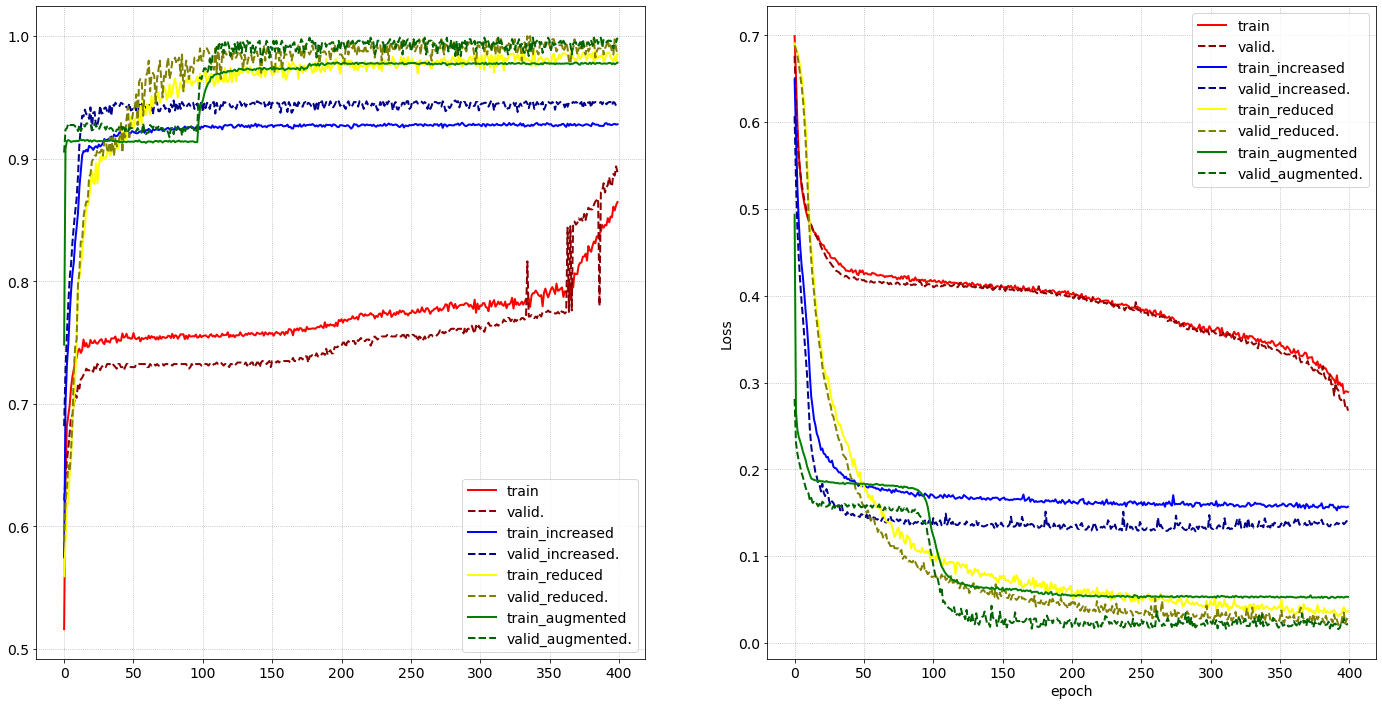

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history['accuracy'    ],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_accuracy'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history['accuracy'    ],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_accuracy'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history['accuracy'    ],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_accuracy'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[        'loss'],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_loss'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history[    'loss'],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_loss'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history[    'loss'],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_loss'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history[    'loss'],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_loss'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

#fig.savefig('figures/ex1_accuracy_loss.pdf')

plt.show()

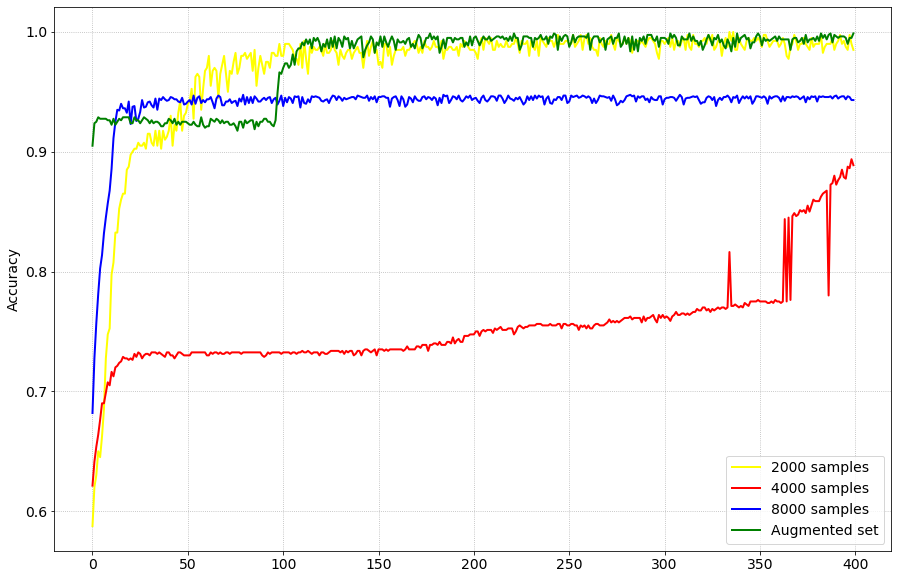

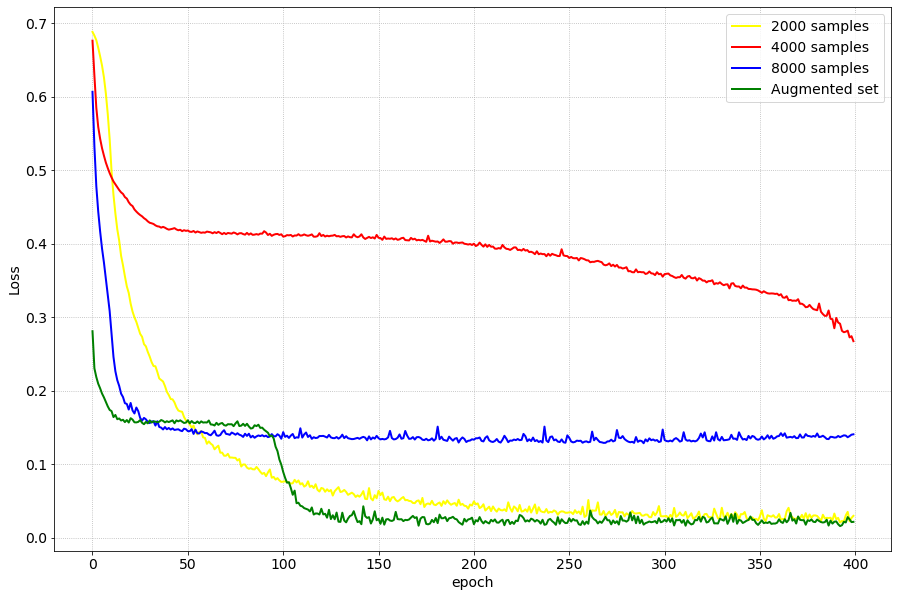

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(fit_red.history['val_accuracy'],label="2000 samples",   lw = 2, ls = 'solid', c = 'yellow')
ax.plot(fit.history[    'val_accuracy'],label="4000 samples",           lw = 2, ls = 'solid', c = 'red')
ax.plot(fit_inc.history['val_accuracy'],label="8000 samples", lw = 2, ls = 'solid', c = 'blue')
ax.plot(fit_aug.history['val_accuracy'],label="Augmented set", lw = 2, ls = 'solid', c = 'green')
ax.legend(loc='lower right')
ax.grid(ls='dotted')
ax.set_ylabel('Accuracy')
#fig.savefig('figures/ex1_accuracy.pdf')


fig,ax=plt.subplots(figsize=(15,10))
ax.plot(fit_red.history['val_loss'],label="2000 samples",   lw = 2, ls = 'solid', c = 'yellow')
ax.plot(fit.history[    'val_loss'],label="4000 samples",           lw = 2, ls = 'solid', c = 'red')
ax.plot(fit_inc.history['val_loss'],label="8000 samples", lw = 2, ls = 'solid', c = 'blue')
ax.plot(fit_aug.history['val_loss'],label="Augmented set", lw = 2, ls = 'solid', c = 'green')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')
#fig.savefig('figures/ex1_loss.pdf')

plt.show()

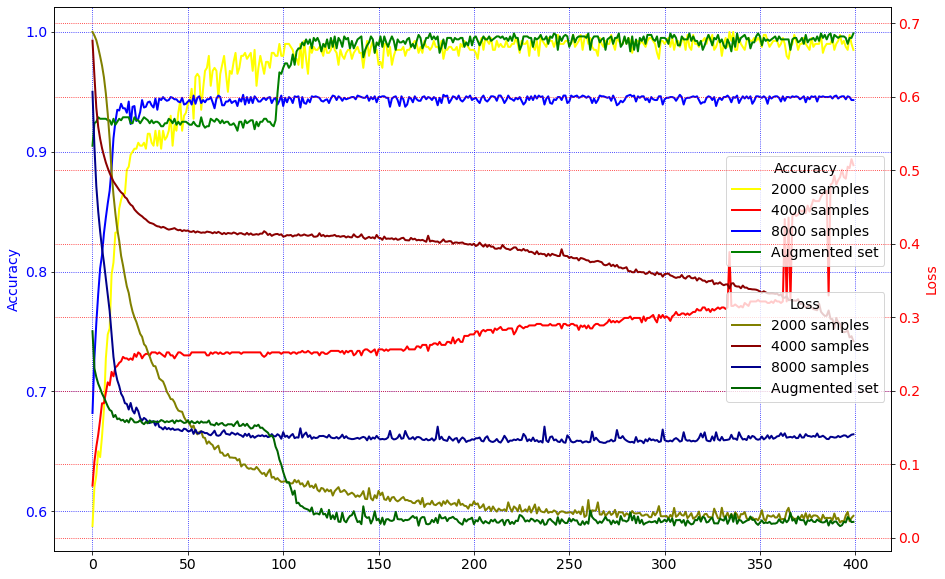

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
ax.grid(ls='dotted', color = 'blue')
ax1 = ax.twinx()
ax1.grid(ls='dotted', color = 'red')
ax.plot(fit_red.history['val_accuracy'],label="2000 samples",   lw = 2, ls = 'solid', c = 'yellow')
ax.plot(fit.history[    'val_accuracy'],label="4000 samples",           lw = 2, ls = 'solid', c = 'red')
ax.plot(fit_inc.history['val_accuracy'],label="8000 samples", lw = 2, ls = 'solid', c = 'blue')
ax.plot(fit_aug.history['val_accuracy'],label="Augmented set", lw = 2, ls = 'solid', c = 'green')
ax.legend(title='Accuracy',loc='center right', bbox_to_anchor=(1, 0.625))
ax.set_ylabel('Accuracy', color = 'blue')
ax.tick_params(axis='y', labelcolor='blue')

ax1.plot(fit_red.history['val_loss'],label="2000 samples",   lw = 2, ls = 'solid', c = 'olive')
ax1.plot(fit.history[    'val_loss'],label="4000 samples",           lw = 2, ls = 'solid', c = 'darkred')
ax1.plot(fit_inc.history['val_loss'],label="8000 samples", lw = 2, ls = 'solid', c = 'darkblue')
ax1.plot(fit_aug.history['val_loss'],label="Augmented set", lw = 2, ls = 'solid', c = 'darkgreen')
ax1.set_xlabel('epoch')
ax1.set_ylabel("Loss", color = 'red')
ax1.legend(title = 'Loss',loc = 'center right', bbox_to_anchor=(1, 0.375))
ax1.tick_params(axis='y', labelcolor='red')
#fig.savefig('figures/ex1_loss.pdf')

plt.show()

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred_red = model_red.predict(grid_r)
pred     = model.predict    (grid_r)
pred_inc = model_inc.predict(grid_r)
pred_aug = model_aug.predict(grid_r)

51 2601
[50. 50.]


(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)


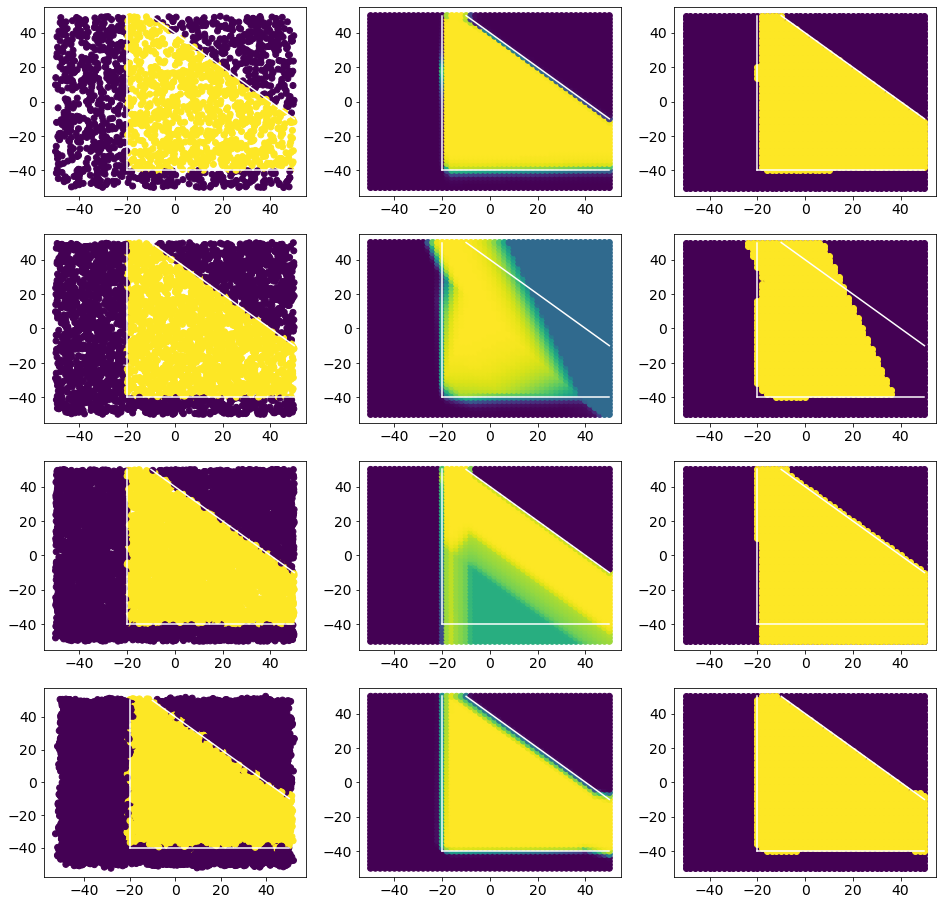

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(4,3,figsize=(16,16))
ax=AX[0,0]
ax.scatter(x_red[:,0],x_red[:,1],c=y_red)
boundaries()
ax=AX[0,1]
print(grid.shape, pred_red.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_red[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_red>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[1,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1,1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[1,2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[2,0]
ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
boundaries()
ax=AX[2,1]
print(grid.shape, pred_inc.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
boundaries()
ax=AX[2,2]
W1=np.where(pred_inc>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[3,0]
ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
boundaries()
ax=AX[3,1]
print(grid.shape, pred_aug.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
boundaries()
ax=AX[3,2]
W1=np.where(pred_aug>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

#fig.savefig('figures/ex1_grid_all.pdf')

plt.show()

(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)


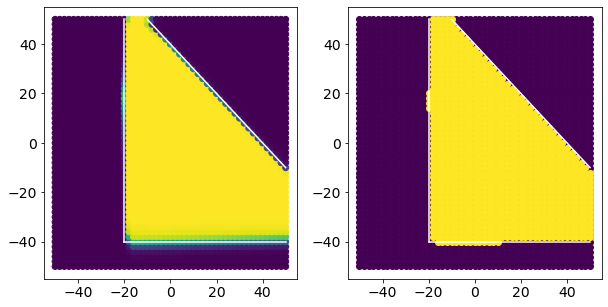

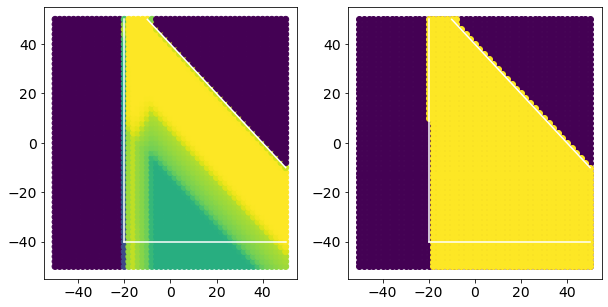

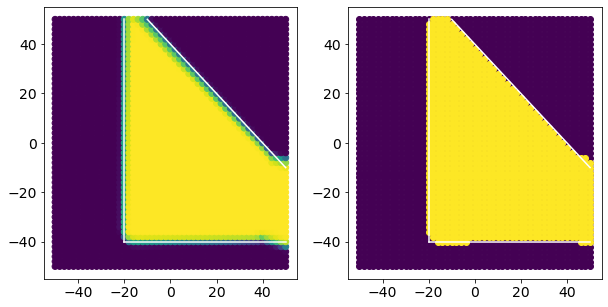

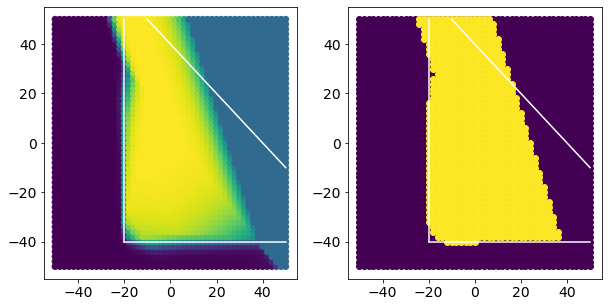

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(10,5))
ax=AX[0]
print(grid.shape, pred_red.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_red[:,0])
boundaries()
ax=AX[1]
W1=np.where(pred_red>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

#fig.savefig('figures/ex1_grid_red.pdf')


fig,AX=plt.subplots(1,2,figsize=(10,5))
ax=AX[0]
print(grid.shape, pred_inc.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
boundaries()
ax=AX[1]
W1=np.where(pred_inc>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

#fig.savefig('figures/ex1_grid_inc.pdf')

fig,AX=plt.subplots(1,2,figsize=(10,5))
ax=AX[0]
print(grid.shape, pred_aug.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
boundaries()
ax=AX[1]
W1=np.where(pred_aug>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

#fig.savefig('figures/ex1_grid_aug.pdf')

fig,AX=plt.subplots(1,2,figsize=(10,5))
ax=AX[0]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[1]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

#fig.savefig('figures/ex1_grid.pdf')
plt.show()

### Iterating the training multiple times to have average initial weights

In [7]:

x_red_red = np.loadtxt(filename('data_red_red', TYPE), delimiter=' ')
y_red_red = np.loadtxt(filename('labels_red_red', TYPE), delimiter=' ')
N_red_red = len(x_red_red)


L_red_red = len(x_red_red[0])
print('Reduced set:', L_red_red)


N_train_red_red = int( perc_train * N_red_red )

print(f'Reduced data\t\t: {N_red_red}\t\t\ttrain\t\t: {N_train_red_red}')

(x_train_red_red, y_train_red_red) = (x_red_red[:N_train_red_red],y_red_red[:N_train_red_red])
(x_valid_red_red, y_valid_red_red) = (x_red_red[N_train_red_red:],y_red_red[N_train_red_red:])
print("Train:",len(x_train_red_red),"\t Validation:",len(x_valid_red_red))

x_train_red_red = Rescale(x_train_red_red)
x_valid_red_red = Rescale(x_valid_red_red)


Reduced set: 2
Reduced data		: 500			train		: 400
Train: 400 	 Validation: 100


In [8]:

x_inc_inc = np.loadtxt(filename('data_inc_inc', TYPE), delimiter=' ')
y_inc_inc = np.loadtxt(filename('labels_inc_inc', TYPE), delimiter=' ')
N_inc_inc = len(x_inc_inc)


L_inc_inc = len(x_inc_inc[0])
print('incuced set:', L_inc_inc)


N_train_inc_inc = int( perc_train * N_inc_inc )

print(f'incuced data\t\t: {N_inc_inc}\t\t\ttrain\t\t: {N_train_inc_inc}')

(x_train_inc_inc, y_train_inc_inc) = (x_inc_inc[:N_train_inc_inc],y_inc_inc[:N_train_inc_inc])
(x_valid_inc_inc, y_valid_inc_inc) = (x_inc_inc[N_train_inc_inc:],y_inc_inc[N_train_inc_inc:])
print("Train:",len(x_train_inc_inc),"\t Validation:",len(x_valid_inc_inc))

x_train_inc_inc = Rescale(x_train_inc_inc)
x_valid_inc_inc = Rescale(x_valid_inc_inc)


incuced set: 2
incuced data		: 16000			train		: 12800
Train: 12800 	 Validation: 3200


In [ ]:
nepoch = 400
def create_DNN(activation, dropout_rate, layers):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation = activation))
    for i in range(len(layers)):
        model.add(Dense(layers[i],activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid"))
    return model

def compile_model(optimizer=tf.keras.optimizers.Adam(), activation = "relu", dropout_rate = 0.2, layers = (20, 20)):
    # create the mode
    model=create_DNN(activation, dropout_rate, layers)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

hist_red_red = []
hist_red     = []
hist         = []
hist_inc     = []
hist_inc_inc = []
hist_aug     = []

hist_red_red_acc = []
hist_red_acc     = []
hist_acc         = []
hist_inc_acc     = []
hist_inc_inc_acc = []
hist_aug_acc     = []

hist_red_red_loss = []
hist_red_loss     = []
hist_loss         = []
hist_inc_loss     = []
hist_inc_inc_loss = []
hist_aug_loss     = []

hist_red_red_loss_val = []
hist_red_loss_val     = []
hist_loss_val         = []
hist_inc_loss_val     = []
hist_inc_inc_loss_val = []
hist_aug_loss_val     = []

for i in range(10):
    model_red_red = compile_model()
    fit = model_red_red.fit(x_train_red_red, y_train_red_red,
                            epochs=nepoch, batch_size=50,
                            validation_data=(x_valid_red_red,y_valid_red_red),
                            verbose=0)
    hist_red_red_acc.append(fit.history['accuracy'][-1])
    hist_red_red.append(fit.history['val_accuracy'][-1])
    hist_red_red_loss.append(fit.history['loss'][-1])
    hist_red_red_loss_val.append(fit.history['val_loss'][-1])
    print(i, 'red_red')
    del fit, model_red_red

    model_red = compile_model()
    fit = model_red.fit(x_train_red, y_train_red,
                            epochs=nepoch, batch_size=50,
                            validation_data=(x_valid_red,y_valid_red),
                            verbose=0)
    hist_red_acc.append(fit.history['accuracy'][-1])
    hist_red.append(fit.history['val_accuracy'][-1])
    hist_red_loss.append(fit.history['loss'][-1])
    hist_red_loss_val.append(fit.history['val_loss'][-1])
    print(i, 'red')
    del fit, model_red

    model = compile_model()
    fit = model.fit(x_train, y_train,
                            epochs=nepoch, batch_size=50,
                            validation_data=(x_valid,y_valid),
                            verbose=0)
    hist_acc.append(fit.history['accuracy'][-1])
    hist.append(fit.history['val_accuracy'][-1])
    hist_loss.append(fit.history['loss'][-1])
    hist_loss_val.append(fit.history['val_loss'][-1])
    print(i, 'reg')
    del fit, model

    model_inc = compile_model()
    fit = model_inc.fit(x_train_inc, y_train_inc,
                            epochs=nepoch, batch_size=50,
                            validation_data=(x_valid_inc,y_valid_inc),
                            verbose=0)
    hist_inc_acc.append(fit.history['accuracy'][-1])
    hist_inc.append(fit.history['val_accuracy'][-1])
    hist_inc_loss.append(fit.history['loss'][-1])
    hist_inc_loss_val.append(fit.history['val_loss'][-1])
    print(i, 'inc')
    del fit, model_inc

    model_inc_inc = compile_model()
    fit = model_inc_inc.fit(x_train_inc_inc, y_train_inc_inc,
                            epochs=nepoch, batch_size=50,
                            validation_data=(x_valid_inc_inc,y_valid_inc_inc),
                            verbose=0)
    hist_inc_inc_acc.append(fit.history['accuracy'][-1])
    hist_inc_inc.append(fit.history['val_accuracy'][-1])
    hist_inc_inc_loss.append(fit.history['loss'][-1])
    hist_inc_inc_loss_val.append(fit.history['val_loss'][-1])
    print(i, 'inc_inc')
    del fit, model_inc_inc

    model_aug = compile_model()
    fit = model_aug.fit(x_train_aug, y_train_aug,
                            epochs=nepoch, batch_size=50,
                            validation_data=(x_valid_aug,y_valid_aug),
                            verbose=0)
    hist_aug_acc.append(fit.history['accuracy'][-1])
    hist_aug.append(fit.history['val_accuracy'][-1])
    hist_aug_loss.append(fit.history['loss'][-1])
    hist_aug_loss_val.append(fit.history['val_loss'][-1])
    print(i, 'aug')
    del fit, model_aug

n = 10
results_fits = pd.DataFrame({'validation':  np.concatenate([hist_red_red, hist_red, hist, hist_inc, hist_inc_inc, hist_aug]),
                             'training':  np.concatenate([hist_red_red_acc, hist_red_acc, hist_acc, hist_inc_acc, hist_inc_inc_acc, hist_aug_acc]),
                             'loss_val':  np.concatenate([hist_red_red_loss_val, hist_red_loss_val, hist_loss_val, hist_inc_loss_val, hist_inc_inc_loss_val, hist_aug_loss_val]),
                             'loss':  np.concatenate([hist_red_red_loss, hist_red_loss, hist_loss, hist_inc_loss, hist_inc_inc_loss, hist_aug_loss]),
                             'group': np.concatenate([np.repeat('500 samples', n),np.repeat('2000 samples', n),np.repeat('4000 samples', n),np.repeat('8000 samples', n),np.repeat('16000 samples', n),np.repeat('Augmented set', n)])})
results_fits.to_csv('Boxplot_6.csv')

0 red_red
0 red
0 reg
0 inc
0 inc_inc
0 aug
1 red_red
1 red
1 reg
1 inc
1 inc_inc
1 aug
2 red_red
2 red
2 reg
2 inc
2 inc_inc


2 aug
3 red_red
3 red
3 reg
3 inc
3 inc_inc
3 aug
4 red_red
4 red
4 reg
4 inc
4 inc_inc
4 aug
5 red_red
5 red
5 reg
5 inc
5 inc_inc
5 aug
6 red_red
6 red
6 reg
6 inc
6 inc_inc
6 aug
7 red_red
7 red
7 reg
7 inc
7 inc_inc
7 aug
8 red_red
8 red
8 reg
8 inc
8 inc_inc
8 aug
9 red_red
9 red
9 reg
9 inc
9 inc_inc
9 aug


In [13]:
results_fits = pd.concat([pd.read_csv('Boxplot_'+str(i)+'.csv') for i in range(1,11)])
results_fits

,Unnamed: 0,validation,training,loss_val,loss,group
0,0,0.94000,0.915000,0.137474,0.190260,500 samples
1,1,0.89000,0.935000,0.199374,0.166291,500 samples
2,2,0.95000,0.935000,0.152716,0.181263,500 samples
3,3,0.94000,0.937500,0.197619,0.197786,500 samples
4,4,0.91000,0.917500,0.214964,0.206555,500 samples
...,...,...,...,...,...,...
55,55,0.94000,0.924187,0.153394,0.176716,Augmented set
56,56,0.99625,0.980500,0.020998,0.046772,Augmented set
57,57,0.99625,0.978594,0.020850,0.050032,Augmented set
58,58,0.98500,0.977500,0.027385,0.051754,Augmented set


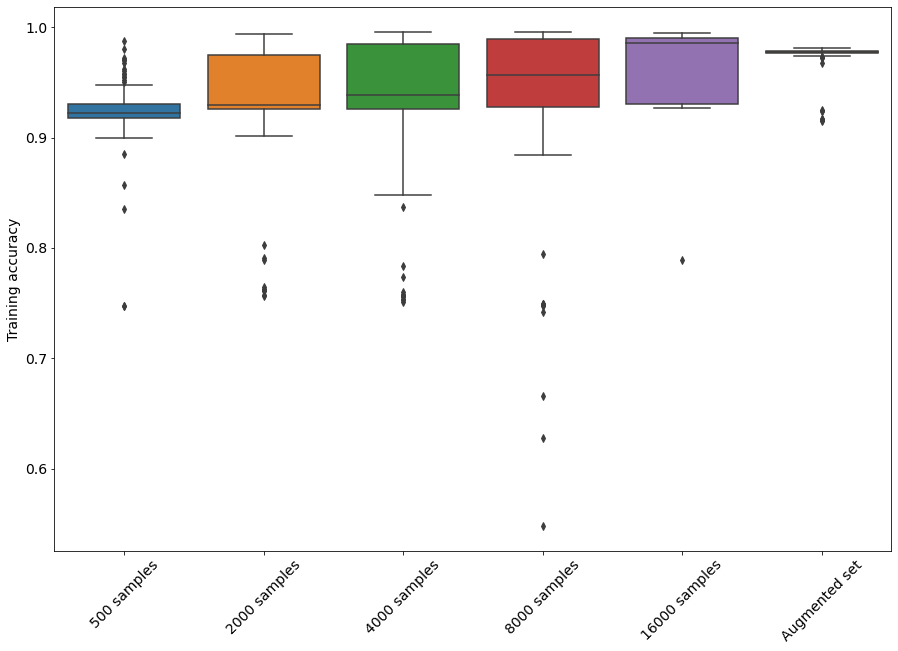

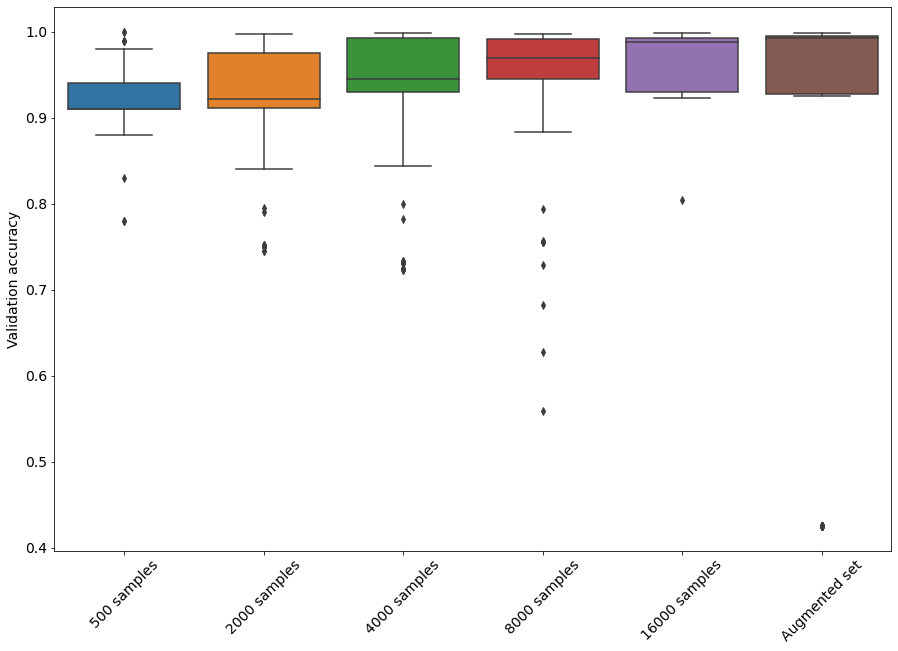

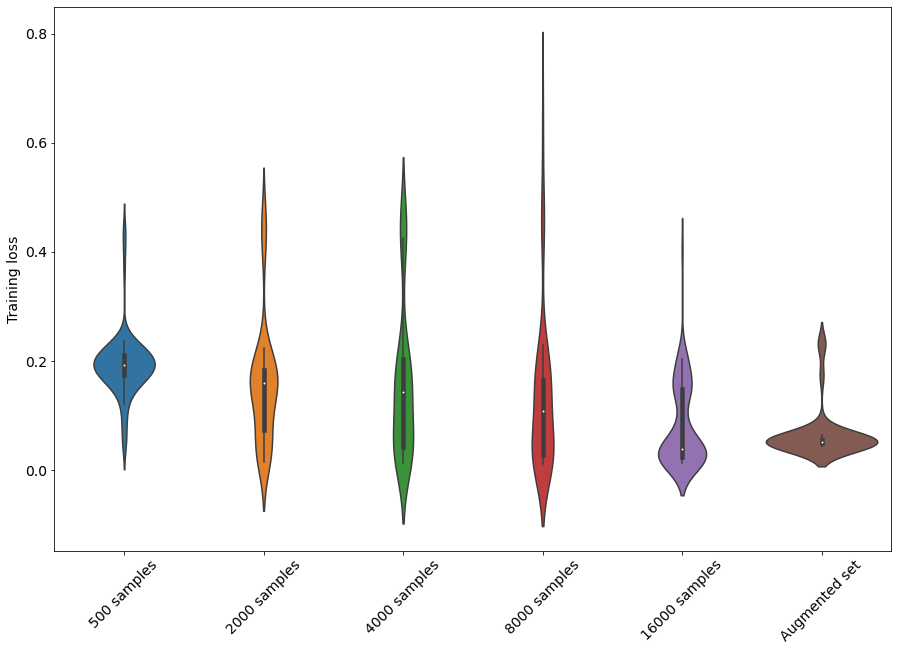

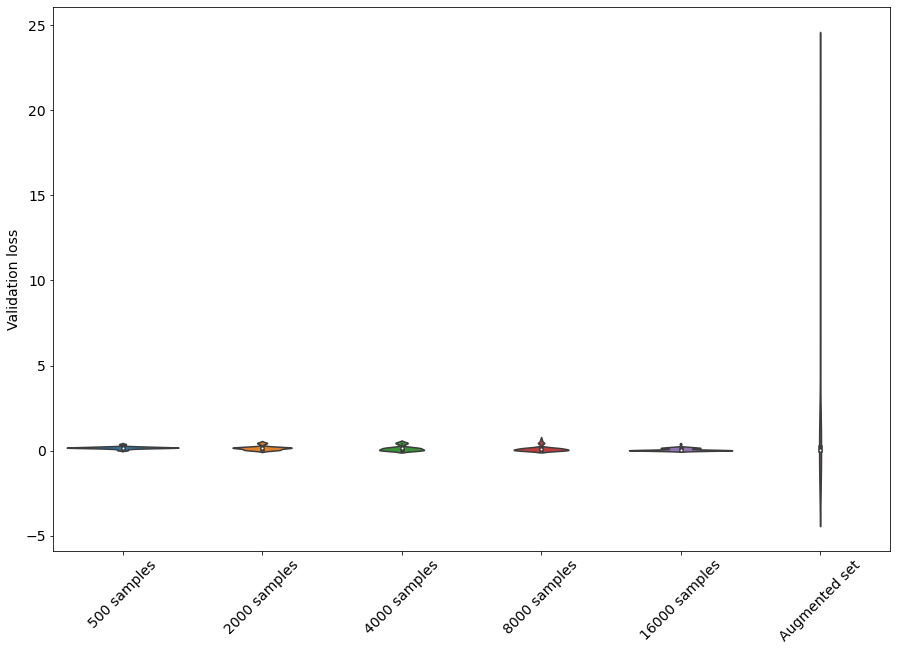

In [17]:
fig, ax = plt.subplots(ncols = 1, figsize=(15,10))

g = sns.boxplot(x='group', y='training', data=results_fits, ax = ax )
ax.set_xlabel('')
ax.set_ylabel('Training accuracy')
ax.tick_params(axis='x', labelrotation= 45)

fig.savefig('figures/ex1_boxplot_training_20.pdf')


fig, ax = plt.subplots(ncols = 1, figsize=(15,10))

g = sns.boxplot(x='group', y='validation', data=results_fits, ax = ax )
ax.set_xlabel('')
ax.set_ylabel('Validation accuracy')
ax.tick_params(axis='x', labelrotation= 45)

fig.savefig('figures/ex1_boxplot_validation_20.pdf')


fig, ax = plt.subplots(ncols = 1, figsize=(15,10))

g = sns.violinplot(x='group', y='loss', data=results_fits, ax = ax )
ax.set_xlabel('')
ax.set_ylabel('Training loss')
ax.tick_params(axis='x', labelrotation= 45)

fig.savefig('figures/ex1_boxplot_loss_training_20.pdf')


fig, ax = plt.subplots(ncols = 1, figsize=(15,10))

g = sns.violinplot(x='group', y='loss_val', data=results_fits, ax = ax )
ax.set_xlabel('')
ax.set_ylabel('Validation loss')
ax.tick_params(axis='x', labelrotation= 45)

fig.savefig('figures/ex1_boxplot_loss_validation_20.pdf')

plt.show()

### Computational time 

In [ ]:
model_red_red = compile_model()
%timeit model_red_red.fit(x_train_red_red, y_train_red_red, epochs=nepoch, batch_size=50, validation_data=(x_valid_red_red,y_valid_red_red), verbose=0)

model_red = compile_model()
%timeit model_red.fit(x_train_red, y_train_red, epochs=nepoch, batch_size=50, validation_data=(x_valid_red,y_valid_red), verbose=0)

model = compile_model()
%timeit model.fit(x_train, y_train, epochs=nepoch, batch_size=50, validation_data=(x_valid,y_valid), verbose=0)

model_inc = compile_model()
%timeit model_inc.fit(x_train_inc, y_train_inc, epochs=nepoch, batch_size=50, validation_data=(x_valid_inc,y_valid_inc), verbose=0)

model_inc_inc =  compile_model()
%timeit model_inc_inc.fit(x_train_inc_inc, y_train_inc_inc,epochs=nepoch, batch_size=50,validation_data=(x_valid_inc_inc,y_valid_inc_inc),verbose=0)

model_aug = compile_model()
%timeit model_aug.fit(x_train_aug, y_train_aug,epochs=nepoch, batch_size=50,validation_data=(x_valid_aug,y_valid_aug),verbose=0)

In [ ]:
from scipy.optimize import curve_fit
from scipy import stats

def func(x, a, b):
    return a + b * x

def chisqr(obs, exp, error):
    chisqr = 0
    for i in range(len(obs)):
        chisqr = chisqr + ((obs[i]-exp[i])**2)/(error[i]**2)
    return chisqr

times = pd.read_csv('time.dat', sep='\t', names=['training_samples', 'average_time', 'average_err'])
fig,ax=plt.subplots(figsize=(15,10))
ax.errorbar(times.training_samples, times.average_time, times.average_err, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0, label='Computational time')
ax.grid(ls='dotted')
ax.set_ylabel('Elapsed time [s]')
ax.set_xlabel('Training samples')

popt, pcov = curve_fit(func, times.training_samples, times.average_time, sigma = times.average_err)
perr       = np.sqrt(np.diag(pcov))

x = np.linspace(0, 33e3, 10000)

# prepare confidence level curves
nstd = 5. # to draw 5-sigma intervals
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr

fit = func(x, *popt)
fit_up = func(x, *popt_up)
fit_dw = func(x, *popt_dw)

#plot
ax.plot( x, fit, lw = 2, label = 'Best fit line', ls = 'dashed' )
ax.fill_between(x, fit_up, fit_dw, alpha=.25, label='5-sigma interval')

ax.legend(loc='upper left')
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

print(chisqr(func(times.training_samples, popt[0],popt[1]), times.average_time, times.average_err))

## Exercise 2

### Model definition

In [ ]:
def create_DNN(activation, dropout_rate, layers):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation = activation))
    for i in range(len(layers)):
        model.add(Dense(layers[i],activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid"))
    return model

nepoch = 400

### Compilation of the model

In [ ]:
def compile_model(optimizer=tf.keras.optimizers.Adam(), activation = "relu", dropout_rate = 0.2, layers = (20, 20)):
    # create the mode
    model=create_DNN(activation, dropout_rate, layers)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

### Grid search

Huge computation in next cell $\sim$3h

In [ ]:
'''# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn = compile_model)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#optimizer = ['SGD', 'Nadam']
# list of activation functions
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# list of dropout rates
#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# define parameter dictionary
# #param_grid = dict(optimizer=optimizer, activation = activation, dropout_rate=dropout_rate)
# param_grid = dict(optimizer=optimizer, activation = activation)
# #param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train, epochs=100, batch_size = 50, shuffle = True, verbose = 0)

results = pd.DataFrame.from_dict(grid_result.cv_results_)
results.to_csv('GridSearchResults_New.csv')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

'# call Keras scikit wrapper\nmodel_gridsearch = KerasClassifier(build_fn = compile_model)\n\n# list of allowed optional arguments for the optimizer, see `compile_model()`\noptimizer = [\'SGD\', \'RMSprop\', \'Adagrad\', \'Adadelta\', \'Adam\', \'Adamax\', \'Nadam\']\n#optimizer = [\'SGD\', \'Nadam\']\n# list of activation functions\nactivation = [\'softmax\', \'softplus\', \'softsign\', \'relu\', \'tanh\', \'sigmoid\', \'hard_sigmoid\', \'linear\']\n# list of dropout rates\n#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]\n# define parameter dictionary\n#param_grid = dict(optimizer=optimizer, activation = activation, dropout_rate=dropout_rate)\nparam_grid = dict(optimizer=optimizer, activation = activation)\n#param_grid = dict(optimizer=optimizer)\n# call scikit grid search module\ngrid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)\ngrid_result = grid.fit(x_train,y_train, epochs=100, batch_size = 50, shuffle = True, verbose = 0)\n\

In [ ]:
#results = pd.read_csv('GridSearchResults.csv')
results = pd.read_csv('GridSearchResults_New.csv')
best_result = results[results["rank_test_score"] == 1]
best_result

activation_best = best_result.param_activation.values[0]
optimizer_best  = best_result.param_optimizer.values[0]
print(activation_best, optimizer_best)

relu Adam


In [ ]:
'''model_gridsearch = KerasClassifier(build_fn = compile_model)

dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
layers       = [(20,20), (30,30), (80,80), (20,30,20), (40,20), (10,20,30)]
param_grid = dict(dropout_rate=dropout_rate, layers=layers)

grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train, epochs=nepoch, batch_size = 50, shuffle = True, verbose = 0)

results_d = pd.DataFrame.from_dict(grid_result.cv_results_)
results_d.to_csv('GridSearchResults_DropoutRate_New.csv')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.
25/25 [==============================] - 0s 1ms/step - loss: 0.0370 - accuracy: 0.9862
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.7/py/lib/python3.7/site-p

In [ ]:
results_d     = pd.read_csv('GridSearchResults_DropoutRate_New.csv')
best_result_d = results_d[results_d["rank_test_score"] == 1]
best_result_d

dropout_best    = best_result_d.param_dropout_rate.values[0]
layers_best     = ast.literal_eval(best_result_d.param_layers.values[0])

print(dropout_best, layers_best)

0.0 (80, 80)


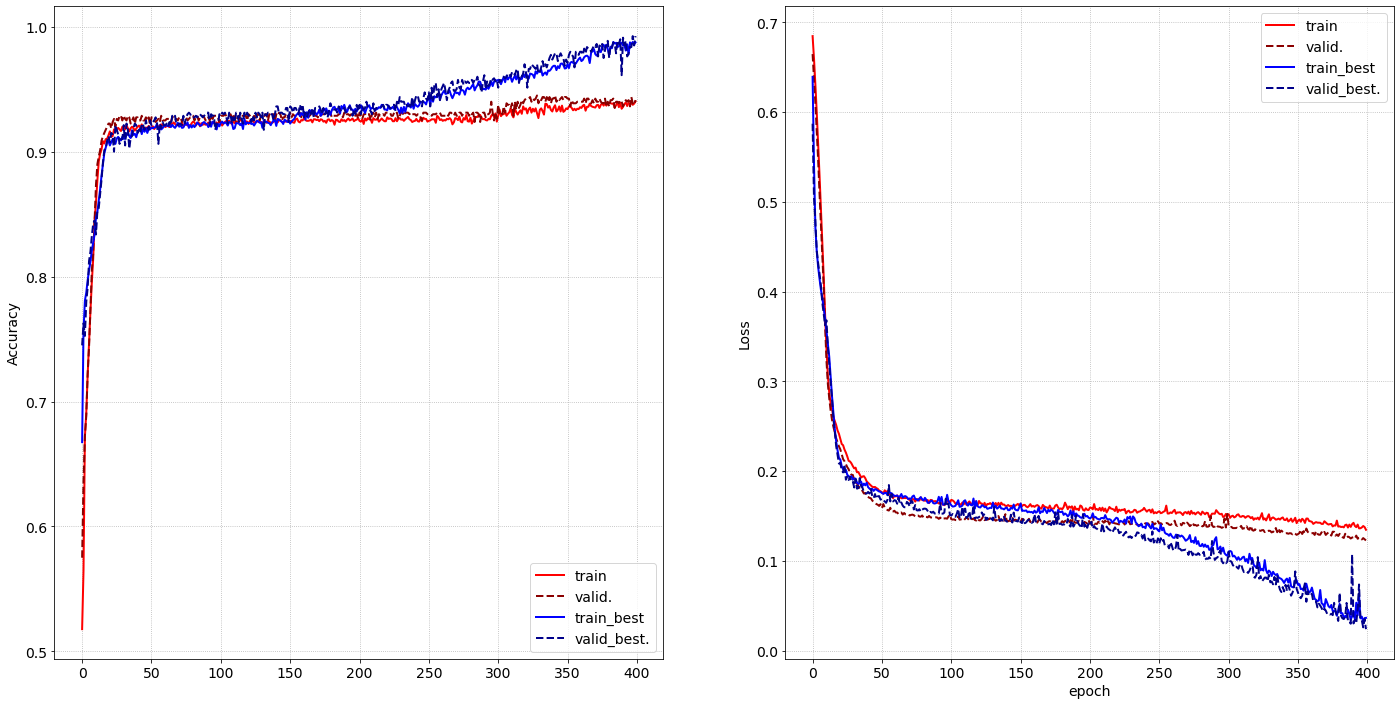

In [ ]:
model_best      = compile_model(optimizer_best ,activation_best, dropout_best, layers_best)
fit_best        = model_best.fit(x_train, y_train,
                                 epochs=nepoch, batch_size=50,
                                 validation_data=(x_valid,y_valid),
                                 verbose=1)

fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[     'accuracy'    ],label="train",       lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[     'val_accuracy'],label="valid.",      lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_best.history['accuracy'    ],label="train_best",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_best.history['val_accuracy'],label="valid_best.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.legend(loc='lower right')
ax.grid(ls='dotted')
ax.set_ylabel('Accuracy')

ax=AX[1]
ax.plot(fit.history[         'loss'],label="train",       lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[     'val_loss'],label="valid.",      lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_best.history[    'loss'],label="train_best",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_best.history['val_loss'],label="valid_best.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

#fig.savefig('figures/ex2_train_validation.pdf')

plt.show()

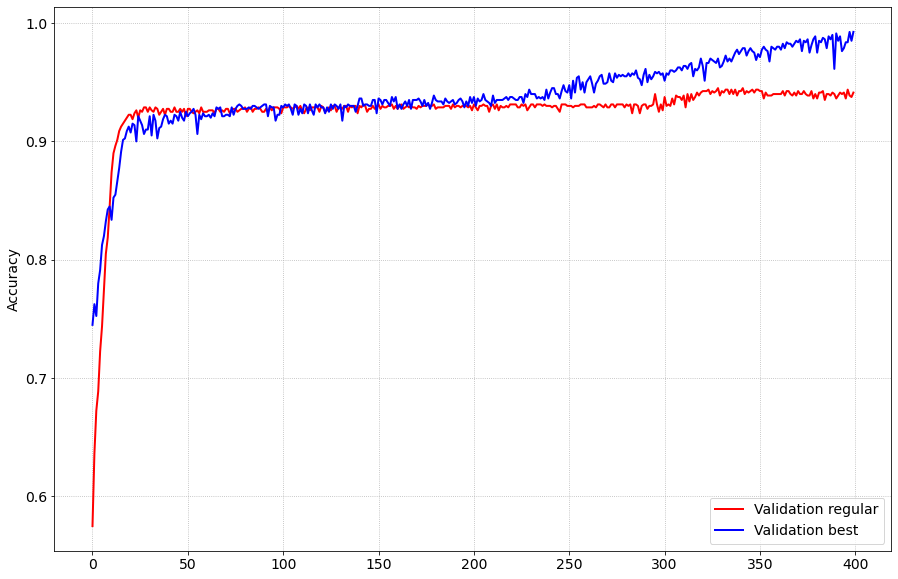

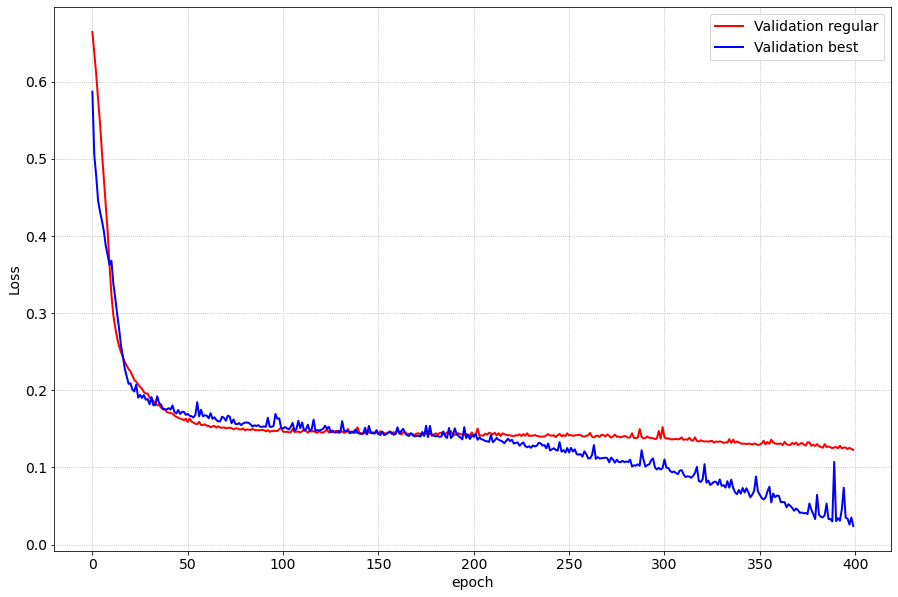

In [ ]:
fig,AX=plt.subplots(figsize=(15,10))
ax=AX
ax.plot(fit.history[     'val_accuracy'],label="Validation regular", lw = 2, ls = 'solid', c = 'red')
ax.plot(fit_best.history['val_accuracy'],label="Validation best",    lw = 2, ls = 'solid', c = 'blue')
ax.legend(loc='lower right')
ax.grid(ls='dotted')
ax.set_ylabel('Accuracy')

#fig.savefig('figures/ex2_accuracy.pdf')


fig,AX=plt.subplots(figsize=(15,10))
ax=AX
ax.plot(fit.history[     'val_loss'],label="Validation regular", lw = 2, ls = 'solid', c = 'red')
ax.plot(fit_best.history['val_loss'],label="Validation best",    lw = 2, ls = 'solid', c = 'blue')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

#fig.savefig('figures/ex2_loss.pdf')

plt.show()

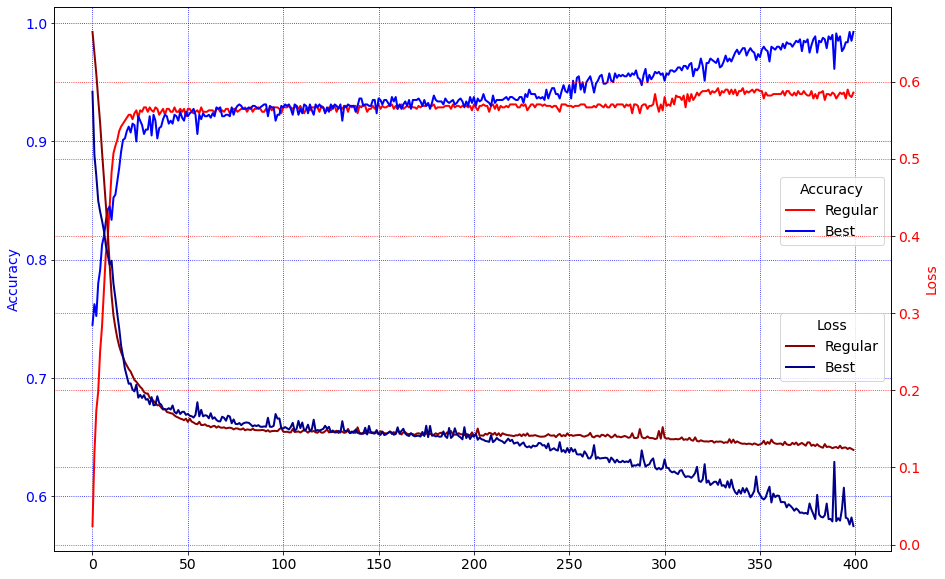

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
ax.grid(ls='dotted', color = 'blue')
ax1 = ax.twinx()
ax1.grid(ls='dotted', color = 'red')
ax.plot(fit.history['val_accuracy'],label="Regular",   lw = 2, ls = 'solid', c = 'red')
ax.plot(fit_best.history[    'val_accuracy'],label="Best",     lw = 2, ls = 'solid', c = 'blue')
ax.legend(title='Accuracy',loc='center right', bbox_to_anchor=(1, 0.625))
ax.set_ylabel('Accuracy', color = 'blue')
ax.tick_params(axis='y', labelcolor='blue')

ax1.plot(fit.history[    'val_loss'],label="Regular",           lw = 2, ls = 'solid', c = 'darkred')
ax1.plot(fit_best.history['val_loss'],label="Best", lw = 2, ls = 'solid', c = 'darkblue')
ax1.set_xlabel('epoch')
ax1.set_ylabel("Loss", color = 'red')
ax1.legend(title = 'Loss',loc = 'center right', bbox_to_anchor=(1, 0.375))
ax1.tick_params(axis='y', labelcolor='red')
#fig.savefig('figures/ex1_loss.pdf')

plt.show()

#### Best results with layers (80, 80), Adam optimizer, relu activation function and 0 of dropout rate.

## Exercise 3

Train: 3200 	 Validation: 800
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 2)                 6         
                                                                 
 dense_50 (Dense)            (None, 20)                60        
                                                                 
 dense_51 (Dense)            (None, 20)                420       
                                                                 
 dropout_14 (Dropout)        (None, 20)                0         
                                                                 
 dense_52 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


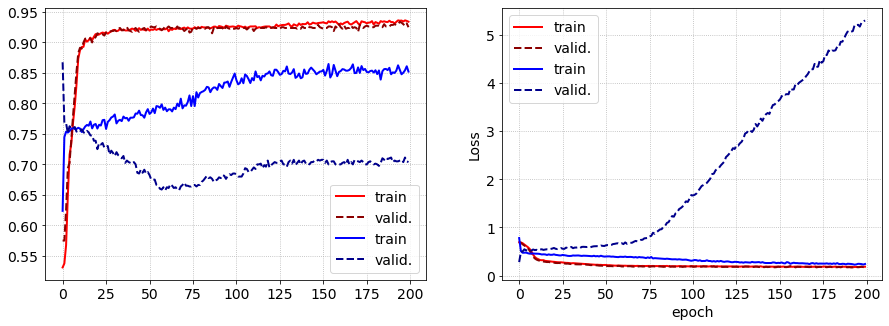

In [ ]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())

def normalize(x):
    return (x - np.min(x, axis=0)) / np.abs(np.max(x, axis=0) - np.min(x, axis=0))

(x_train, y_train) = (x[:N_train],y[:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

x_train_norm 0 normalize(x_train)
x_valid_norm 0 normalize(x_valid)

# reproducibility
np.random.seed(12345)

CASE = 1

# regular set with random initial weights
if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu', kernel_initializer='random_normal'))
    model.add(Dense(20, activation='relu', kernel_initializer='random_normal'))
    model.add(Dense(20, activation='relu', kernel_initializer='random_normal'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=200
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=200
print(model.summary())

model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=0)


fig,AX=plt.subplots(1,2,figsize=(15,5))
ax=AX[0]
ax.plot(fit.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkblue')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[        'loss'],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_loss'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()



In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))

# RESCALE
#grid_r = grid/50
grid_r = grid.copy()
print(grid[:,1])
for i in range( grid.shape[0] ):
    grid_r[i,:] = (grid[i,0]/np.sqrt(grid[:,0].var()), grid[i,1]/np.sqrt(grid[:,1].var()))

pred     = model.predict    (grid_r)

51 2601
[-50. -50. -50. ...  50.  50.  50.]


(2601, 2) (2601, 1)


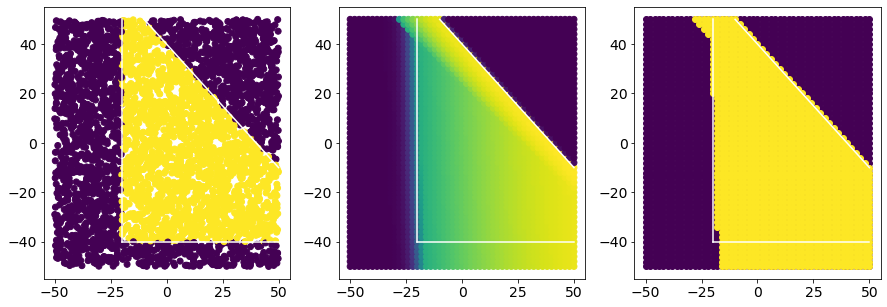

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")

fig, AX = plt.subplots(ncols=3, figsize=(15, 5))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

## Exercise 4

### Reading data

In [ ]:
#%run nonlinear_function.py

Regular set: 2


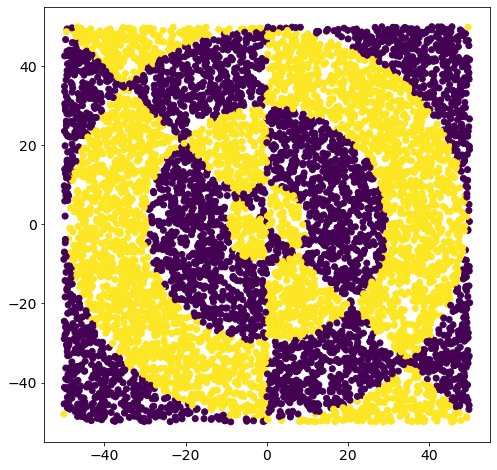

In [ ]:
#training data
perc_train = 0.8

#keras works with numpy arrays: just use them from the start
TYPE = 2
x_diff = np.loadtxt(filename('data_diff_inc', TYPE), delimiter=' ')
y_diff = np.loadtxt(filename('labels_diff_inc', TYPE), delimiter=' ')
N = len(x_diff)

# x_red = np.loadtxt(filename('data_red', TYPE), delimiter=' ')
# y_red = np.loadtxt(filename('labels_red', TYPE), delimiter=' ')
# N_red = len(x_red)

# x_inc = np.loadtxt(filename('data_inc', TYPE), delimiter=' ')
# y_inc = np.loadtxt(filename('labels_inc', TYPE), delimiter=' ')
# N_inc = len(x_inc)

# x_aug = np.zeros( shape = (x.shape[0] * 10, x.shape[1]) )
# y_aug = np.zeros( shape = y.shape[0] * 10 )
# for i in range( x.shape[0] ):
#     S    = np.random.normal( 0, 1 , size = ( 10, 2 ) )
#     x_aug[i*10:i*10+10] = np.array( [x[i, 0] + S[:, 0], x[i, 1] + S[:, 1]] ).T
#     y_aug[i*10:i*10+10] = y[i]
# N_aug = len(x_aug)

#dim of a sample
L = len(x_diff[0])
print('Regular set:', L)

# L_red = len(x_red[0])
# print('Reduced set:', L_red)

# L_inc = len(x_inc[0])
# print('Increased set:', L_inc)

# L_aug = len(x_aug[0])
# print('Augmented set:', L_inc)


# N_train_red = int( perc_train * N_red )
# N_train_inc = int( perc_train * N_inc )
N_train     = int( perc_train * N     )
# N_train_aug = int( perc_train * N_aug )
# print(f'Regular data\t\t: {N}\t\t\ttrain\t\t: {N_train}')
# print(f'Reduced data\t\t: {N_red}\t\t\ttrain\t\t: {N_train_red}')
# print(f'Increased data\t\t: {N_inc}\t\t\ttrain\t\t: {N_train_inc}')
# print(f'Augmented data\t\t: {N_aug}\t\t\ttrain\t\t: {N_train_aug}')

fig, ax = plt.subplots(figsize = (8,8))
# ax[0].scatter(x_red[:,0],x_red[:,1],c=y_red)
ax.scatter(x_diff    [:,0],x_diff    [:,1],c=y_diff    )
# ax[2].scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
# ax[3].scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
plt.show()

### Divide in training and valid set

In [ ]:
(x_train, y_train) = (x_diff[:N_train],y_diff[:N_train])
(x_valid, y_valid) = (x_diff[N_train:],y_diff[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 6400 	 Validation: 1600


### Rescale data

In [ ]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

### GridSearch

In [ ]:
'''model_gridsearch = KerasClassifier(build_fn = compile_model)

dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
layers       = [(10,20,30,40,), (10,20,30,40,30), (10,20,30,40,30,20),(10,20,30,40,30,20,10)]
param_grid = dict(dropout_rate=dropout_rate, layers=layers)

grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train, epochs=nepoch, batch_size = 50, shuffle = True, verbose = 0)

results_d = pd.DataFrame.from_dict(grid_result.cv_results_)
results_d.to_csv('GridSearchResults_EX4.csv')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.
50/50 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.7481
Best: 0.837187 using {'dropout_rate': 0.0, 'layers': (10, 20, 30, 40, 30, 20)}
0.717344 (0.021517) with: {'dropout_rate': 0.0, 'layers': (10, 20, 30, 40)}
0.782656 (0.062819) with: {'dropout_rate': 0.0, 'layers': (10, 20, 30, 40, 30)}
0.837187 (0.074268) with: {'dropout_rate': 0.0, 'layers': (10, 20, 30, 40, 30, 20)}
0.710156 (0.109842) with: {'dropout_rate': 0.0, 'layers': (10, 20, 30, 40, 30, 20, 10)}
0.776562 (0.044986) with: {'dropout_rate': 0.1, 'layers': (10, 20, 30, 40)}
0.754375 (0.062455) with: {'dropout_rate': 0.1, 'layers': (10, 20, 30, 40, 30)}
0.806719 (0.069473) wit

In [ ]:
results_d = pd.read_csv('GridSearchResults_EX4.csv')

best_result_d = results_d[results_d["rank_test_score"] == 1]
best_result_d

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dropout_rate,param_layers,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2,2,133.249594,5.704785,0.420298,0.137582,0.0,"(10, 20, 30, 40, 30, 20)","{'dropout_rate': 0.0, 'layers': (10, 20, 30, 4...",0.786875,0.89375,0.924375,0.74375,0.837187,0.074268,1


In [ ]:
_deepnote_run_altair(best_result_d, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"COUNT(*)","type":"quantitative","sort":null,"aggregate":"count","scale":{"type":"linear","zero":false}},"y":{"field":"COUNT(*)","type":"quantitative","sort":null,"aggregate":"count","scale":{"type":"linear","zero":true}},"color":{"field":"COUNT(*)","type":"quantitative","sort":null,"aggregate":"count","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

64/64 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.9767 - val_loss: 0.0643 - val_accuracy: 0.9794
Epoch 1502/2000
64/64 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9816 - val_loss: 0.0578 - val_accuracy: 0.9781
Epoch 1503/2000
64/64 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9808 - val_loss: 0.0522 - val_accuracy: 0.9794
Epoch 1504/2000
64/64 [==============================] - 0s 4ms/step - loss: 0.0579 - accuracy: 0.9764 - val_loss: 0.0588 - val_accuracy: 0.9794
Epoch 1505/2000
64/64 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9795 - val_loss: 0.0604 - val_accuracy: 0.9812
Epoch 1506/2000
64/64 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9775 - val_loss: 0.0427 - val_accuracy: 0.9850
Epoch 1507/2000
64/64 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9850 - val_loss: 0.0452 - val_accuracy: 0.9825
E

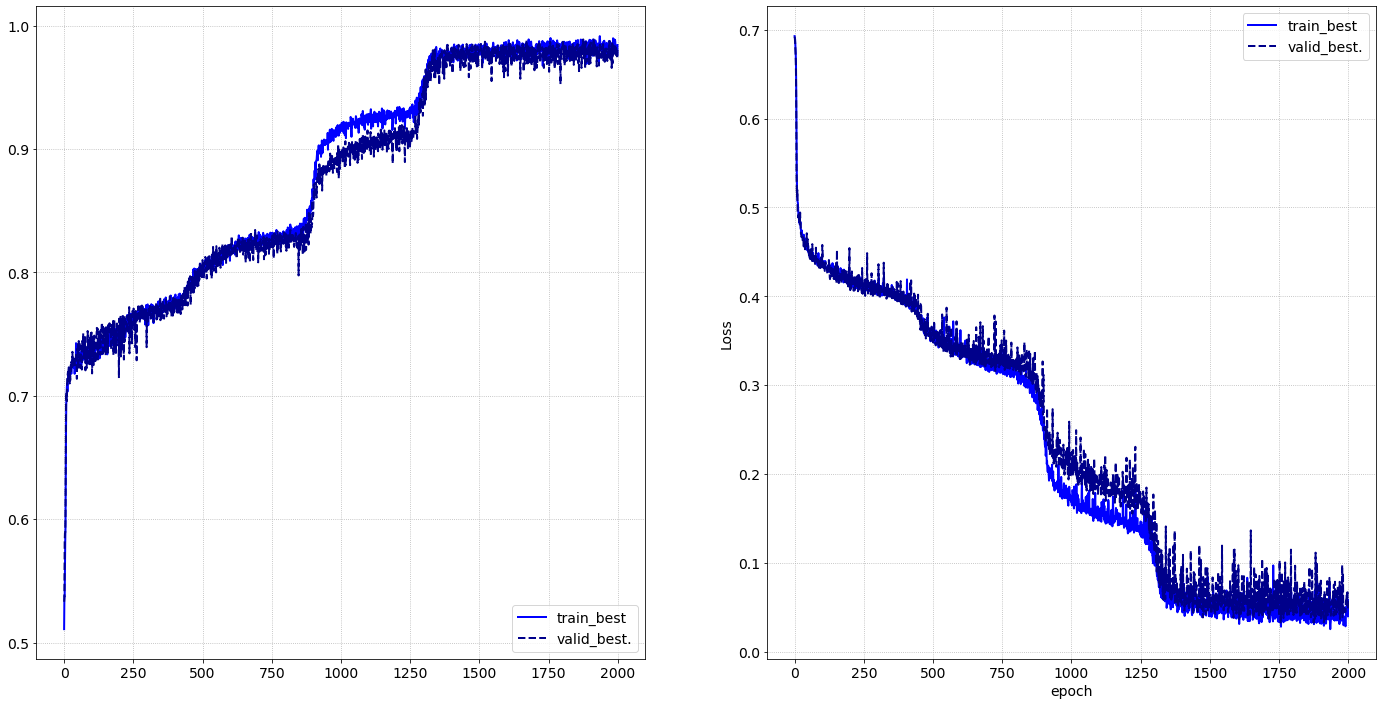

In [ ]:
dropout_best    = best_result_d.param_dropout_rate.values[0]
layers_best     = ast.literal_eval(best_result_d.param_layers.values[0])

model_best      = compile_model(dropout_rate = dropout_best, layers = layers_best)
fit_best        = model_best.fit(x_train, y_train,
                                 epochs=2000, batch_size=100,
                                 validation_data=(x_valid,y_valid),
                                 verbose=1)

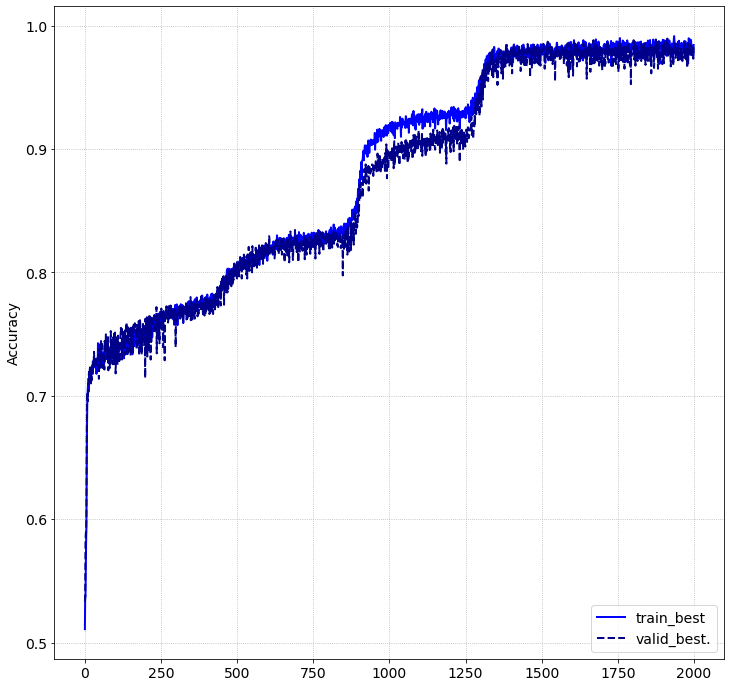

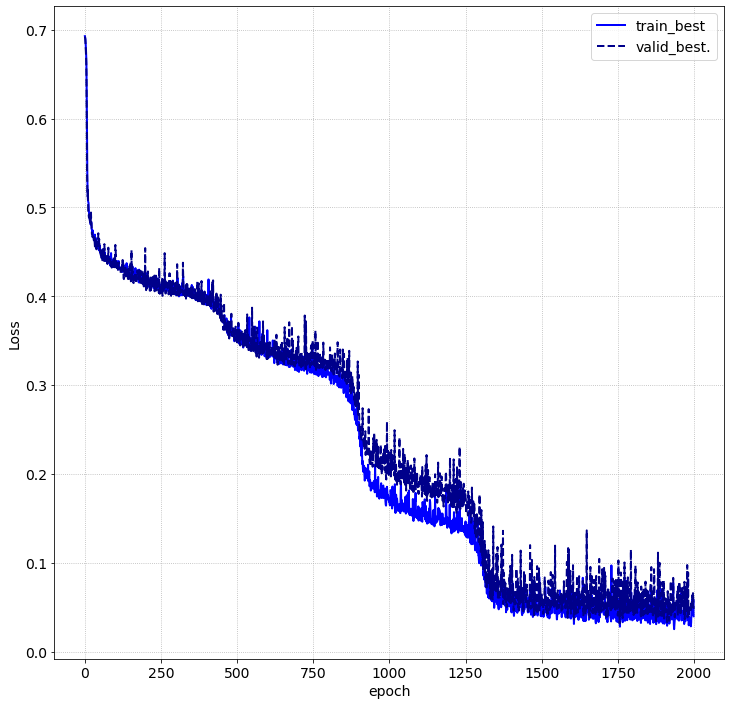

In [ ]:
fig,AX=plt.subplots(figsize=(12,12))
ax=AX
ax.plot(fit_best.history['accuracy'    ],label="train_best",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_best.history['val_accuracy'],label="valid_best.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.legend(loc='lower right')
ax.grid(ls='dotted')
ax.set_ylabel('Accuracy')
fig.savefig('figures/ex4_accuracy.pdf')

fig,AX=plt.subplots(figsize=(12,12))
ax=AX
ax.plot(fit_best.history[    'loss'],label="train_best",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_best.history['val_loss'],label="valid_best.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

fig.savefig('figures/ex4_accuracy.pdf')

plt.show()

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))

# RESCALE
grid_r = grid/50
#grid_r = grid.copy()
#print(grid[:,1])
#for i in range( grid.shape[0] ):
#    grid_r[i,:] = (grid[i,0]/np.sqrt(grid[:,0].var()), grid[i,1]/np.sqrt(grid[:,1].var()))

pred     = model_best.predict    (grid_r)

51 2601


(2601, 2) (2601, 1)


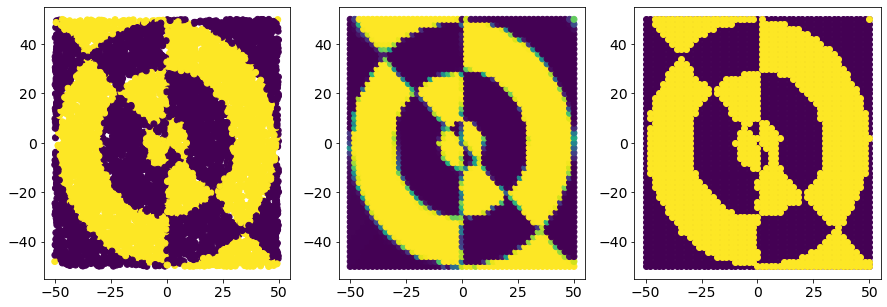

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig, AX = plt.subplots(ncols=3, figsize=(15, 5))
ax=AX[0]
ax.scatter(x_diff[:,0],x_diff[:,1],c=y_diff)
#boundaries()
ax=AX[1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
#boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
#boundaries()

plt.show()

# ax=AX[1,0]
# ax.scatter(x[:,0],x[:,1],c=y)
# boundaries()
# ax=AX[1,1]
# print(grid.shape, pred.shape)
# ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
# boundaries()
# ax=AX[1,2]
# W1=np.where(pred>0.5)[0] 
# ax.scatter(grid[:,0],grid[:,1],c="#440154")
# ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
# boundaries()

# ax=AX[2,0]
# ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
# boundaries()
# ax=AX[2,1]
# print(grid.shape, pred_inc.shape)
# ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
# boundaries()
# ax=AX[2,2]
# W1=np.where(pred_inc>0.5)[0] 
# ax.scatter(grid[:,0],grid[:,1],c="#440154")
# ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
# boundaries()

# ax=AX[3,0]
# ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
# boundaries()
# ax=AX[3,1]
# print(grid.shape, pred_aug.shape)
# ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
# boundaries()
# ax=AX[3,2]
# W1=np.where(pred_aug>0.5)[0] 
# ax.scatter(grid[:,0],grid[:,1],c="#440154")
# ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
# boundaries()
fig.savefig('figures/ex4_grid.pdf')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cb9264e-65a5-431d-a980-16667908489e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>